In [14]:
# 괌 날씨 데이터 분석 - Part 2: API 데이터 분석

이 노트북에서는 National Weather Service API를 활용하여 괌의 실시간 날씨 예보 데이터를 수집하고 분석합니다.

## 목차
1. API 클라이언트 설정
2. 괌 날씨 예보 데이터 수집
3. 예보 데이터 시각화
4. 과거 데이터와 비교 분석
5. 결론 및 인사이트


SyntaxError: invalid syntax (2211848269.py, line 3)

In [16]:
# 필요한 라이브러리 import
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 우리가 만든 모듈들 import
from api_client import get_guam_forecast, compare_with_historical, WeatherAPI
from visualization import plot_forecast_comparison

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 import 완료!")


라이브러리 import 완료!


In [17]:
## 1. API 클라이언트 설정 및 테스트


In [18]:
# 1.1 API 클라이언트 초기화 및 기본 정보 확인
GUAM_LAT = 13.4443
GUAM_LON = 144.7937

print(f"괌의 좌표: 위도 {GUAM_LAT}, 경도 {GUAM_LON}")
print("National Weather Service API를 통해 날씨 데이터를 조회합니다.")
print("API 엔드포인트: https://api.weather.gov")

# API 클라이언트 생성
api_client = WeatherAPI()
print("\nAPI 클라이언트가 성공적으로 초기화되었습니다.")


괌의 좌표: 위도 13.4443, 경도 144.7937
National Weather Service API를 통해 날씨 데이터를 조회합니다.
API 엔드포인트: https://api.weather.gov

API 클라이언트가 성공적으로 초기화되었습니다.


In [19]:
## 2. 괌 날씨 예보 데이터 수집


In [20]:
# 2.1 괌 7일 날씨 예보 조회
try:
    print("괌의 7일 날씨 예보를 조회하는 중...")
    forecast_df = get_guam_forecast()
    
    if forecast_df is not None:
        print("✅ 예보 데이터 조회 성공!")
        print(f"예보 기간: {len(forecast_df)}일")
        print(f"데이터 형태: {forecast_df.shape}")
        
        print("\n=== 7일 예보 데이터 ===")
        print(forecast_df)
        
        # 예보 데이터 요약
        print(f"\n=== 예보 기간 기온 요약 ===")
        print(f"최고기온 평균: {forecast_df['High (°C)'].mean():.1f}°C")
        print(f"최저기온 평균: {forecast_df['Low (°C)'].mean():.1f}°C")
        print(f"최고기온 범위: {forecast_df['High (°C)'].min():.1f}°C ~ {forecast_df['High (°C)'].max():.1f}°C")
        print(f"최저기온 범위: {forecast_df['Low (°C)'].min():.1f}°C ~ {forecast_df['Low (°C)'].max():.1f}°C")
        
        # 데이터 저장
        forecast_df.to_csv("../results/forecast_data.csv", index=False)
        print("\n예보 데이터를 'results/forecast_data.csv'에 저장했습니다.")
        
    else:
        print("❌ 예보 데이터 조회 실패")
        
except Exception as e:
    print(f"❌ 오류 발생: {e}")
    forecast_df = None


괌의 7일 날씨 예보를 조회하는 중...
괌 날씨 예보 데이터를 조회 중...
예보 데이터 조회 성공!
✅ 예보 데이터 조회 성공!
예보 기간: 7일
데이터 형태: (7, 5)

=== 7일 예보 데이터 ===
        Date  High (°C)   Low (°C)  High (°F)  Low (°F)
0 2025-07-01  29.444444  25.000000         85        77
1 2025-07-02  30.000000  25.000000         86        77
2 2025-07-03  30.555556  25.555556         87        78
3 2025-07-04  30.555556  25.000000         87        77
4 2025-07-05  30.555556  25.000000         87        77
5 2025-07-06  30.555556  25.000000         87        77
6 2025-07-07  30.000000  25.000000         86        77

=== 예보 기간 기온 요약 ===
최고기온 평균: 30.2°C
최저기온 평균: 25.1°C
최고기온 범위: 29.4°C ~ 30.6°C
최저기온 범위: 25.0°C ~ 25.6°C

예보 데이터를 'results/forecast_data.csv'에 저장했습니다.


In [21]:
## 3. 예보 데이터 시각화


7일 예보 그래프를 생성 중...


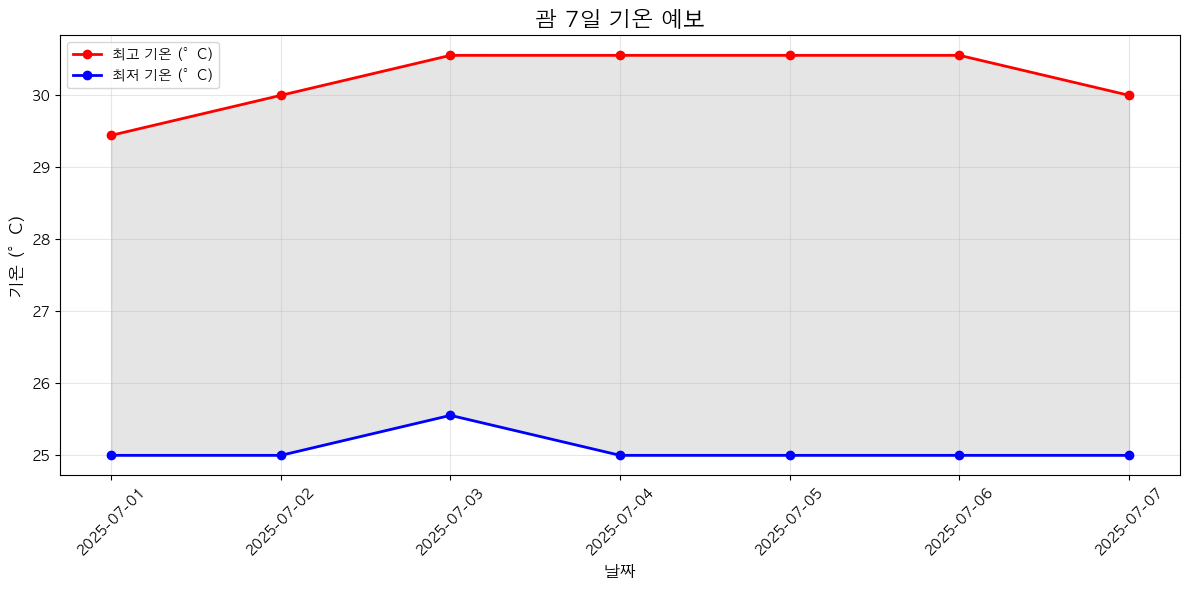

✅ 예보 그래프가 생성되었습니다.


In [22]:
# 3.1 7일 예보 시각화
if forecast_df is not None:
    print("7일 예보 그래프를 생성 중...")
    plot_forecast_comparison(forecast_df, save_path="../results/forecast_visualization.png")
    print("✅ 예보 그래프가 생성되었습니다.")
else:
    print("⚠️ 예보 데이터가 없어 그래프를 생성할 수 없습니다.")
    
    # 예시 데이터로 시각화 함수 테스트
    print("\n예시 데이터로 시각화 함수를 테스트합니다:")
    sample_dates = pd.date_range(start='2024-01-01', periods=7, freq='D')
    sample_df = pd.DataFrame({
        'Date': sample_dates,
        'High (°C)': [30.5, 31.2, 29.8, 30.1, 31.5, 30.8, 29.9],
        'Low (°C)': [24.1, 24.8, 23.9, 24.3, 24.7, 24.2, 23.8]
    })
    
    print("예시 데이터:")
    print(sample_df)
    
    plot_forecast_comparison(sample_df, save_path="../results/sample_forecast.png")
    print("✅ 예시 그래프가 생성되었습니다.")


In [23]:
## 4. 과거 데이터와 비교 분석


In [24]:
# 4.1 과거 데이터 로딩
try:
    historical_df = pd.read_csv("../results/processed_weather_data.csv")
    historical_df['Date'] = pd.to_datetime(historical_df['Date'])
    print("✅ 과거 날씨 데이터 로딩 성공")
    print(f"과거 데이터 기간: {historical_df['Date'].min().date()} ~ {historical_df['Date'].max().date()}")
    print(f"총 {len(historical_df)}일의 데이터")
    
except FileNotFoundError:
    print("❌ 과거 데이터 파일을 찾을 수 없습니다.")
    print("먼저 '01_csv_analysis.ipynb'를 실행하여 과거 데이터를 처리해주세요.")
    historical_df = None


✅ 과거 날씨 데이터 로딩 성공
과거 데이터 기간: 2020-01-01 ~ 2022-12-31
총 1096일의 데이터


In [25]:
# 4.2 예보 데이터와 과거 데이터 비교
if forecast_df is not None and historical_df is not None:
    print("=== 예보 데이터와 과거 데이터 비교 분석 ===")
    
    # 현재 월의 과거 평균과 비교
    current_month = datetime.now().month
    historical_current_month = historical_df[historical_df['Month'] == current_month]
    
    if len(historical_current_month) > 0:
        # 과거 동일 월 평균
        hist_avg_max = historical_current_month['Maximum'].mean()
        hist_avg_min = historical_current_month['Minimum'].mean()
        hist_avg_temp = historical_current_month['Average'].mean()
        
        # 예보 평균
        forecast_avg_max = forecast_df['High (°C)'].mean()
        forecast_avg_min = forecast_df['Low (°C)'].mean()
        forecast_avg_temp = (forecast_avg_max + forecast_avg_min) / 2
        
        print(f"\\n🗓️ {current_month}월 비교 분석:")
        print(f"과거 평균 최고기온: {hist_avg_max:.1f}°C")
        print(f"예보 평균 최고기온: {forecast_avg_max:.1f}°C")
        print(f"차이: {forecast_avg_max - hist_avg_max:+.1f}°C")
        
        print(f"\\n과거 평균 최저기온: {hist_avg_min:.1f}°C")
        print(f"예보 평균 최저기온: {forecast_avg_min:.1f}°C")
        print(f"차이: {forecast_avg_min - hist_avg_min:+.1f}°C")
        
        print(f"\\n과거 평균 기온: {hist_avg_temp:.1f}°C")
        print(f"예보 평균 기온: {forecast_avg_temp:.1f}°C")
        print(f"차이: {forecast_avg_temp - hist_avg_temp:+.1f}°C")
        
        # 편차 분석
        max_diff = abs(forecast_avg_max - hist_avg_max)
        min_diff = abs(forecast_avg_min - hist_avg_min)
        
        print(f"\\n📊 편차 분석:")
        if max_diff <= 1.0 and min_diff <= 1.0:
            print("✅ 예보 기온이 과거 평균과 매우 유사합니다 (±1°C 이내)")
        elif max_diff <= 2.0 and min_diff <= 2.0:
            print("⚠️ 예보 기온이 과거 평균과 약간 차이가 있습니다 (±2°C 이내)")
        else:
            print("🔥 예보 기온이 과거 평균과 상당한 차이가 있습니다 (±2°C 초과)")
            
    else:
        print(f"⚠️ {current_month}월의 과거 데이터가 충분하지 않습니다.")
        
elif forecast_df is None:
    print("⚠️ 예보 데이터가 없어 비교할 수 없습니다.")
elif historical_df is None:
    print("⚠️ 과거 데이터가 없어 비교할 수 없습니다.")


=== 예보 데이터와 과거 데이터 비교 분석 ===
\n🗓️ 7월 비교 분석:
과거 평균 최고기온: 31.0°C
예보 평균 최고기온: 30.2°C
차이: -0.8°C
\n과거 평균 최저기온: 25.4°C
예보 평균 최저기온: 25.1°C
차이: -0.3°C
\n과거 평균 기온: 28.2°C
예보 평균 기온: 27.7°C
차이: -0.5°C
\n📊 편차 분석:
✅ 예보 기온이 과거 평균과 매우 유사합니다 (±1°C 이내)


In [26]:
## 5. 결론 및 인사이트


In [27]:
# 5.1 API 분석 결과 요약
print("=== API 기반 날씨 데이터 분석 결과 ===\\n")

if forecast_df is not None:
    print("🌐 API 데이터 수집 성공:")
    print(f"   • National Weather Service API 활용")
    print(f"   • 7일 예보 데이터 수집 완료")
    print(f"   • 실시간 날씨 정보 제공")
    
    # 예보 안정성 분석
    temp_range_high = forecast_df['High (°C)'].max() - forecast_df['High (°C)'].min()
    temp_range_low = forecast_df['Low (°C)'].max() - forecast_df['Low (°C)'].min()
    
    print(f"\\n🌡️ 예보 기간 기온 안정성:")
    print(f"   • 최고기온 변동폭: {temp_range_high:.1f}°C")
    print(f"   • 최저기온 변동폭: {temp_range_low:.1f}°C")
    
    if temp_range_high <= 3.0 and temp_range_low <= 3.0:
        print("   → 예보 기간 동안 매우 안정적인 기온 예상")
    elif temp_range_high <= 5.0 and temp_range_low <= 5.0:
        print("   → 예보 기간 동안 상대적으로 안정적인 기온 예상")
    else:
        print("   → 예보 기간 동안 기온 변동이 클 것으로 예상")
        
    print(f"\\n📈 활용 가능성:")
    print(f"   • 관광 계획 수립에 유용한 정보 제공")
    print(f"   • 단기 기후 패턴 모니터링 가능")
    print(f"   • 과거 데이터와의 비교를 통한 기후 변화 추적")
    
else:
    print("❌ API 데이터 수집 실패:")
    print("   • 네트워크 연결 문제 또는 API 서비스 장애")
    print("   • 괌 지역 데이터 제공 제한 가능성")
    print("   • 대안: 다른 날씨 API 서비스 활용 검토 필요")

print(f"\\n🔗 API와 CSV 데이터 연계 분석:")
if forecast_df is not None and historical_df is not None:
    print("   ✅ 실시간 예보와 과거 데이터 비교 분석 완료")
    print("   ✅ 기후 패턴의 연속성 및 변화 추적 가능")
elif historical_df is not None:
    print("   ⚠️ 과거 데이터는 있으나 API 데이터 부족")
    print("   → 향후 API 연결 재시도 필요")
else:
    print("   ❌ 종합 분석을 위한 데이터 부족")
    print("   → CSV 분석 노트북 먼저 실행 필요")

print(f"\\n💡 개선 방안:")
print(f"   • API 호출 재시도 로직 강화")
print(f"   • 백업 날씨 데이터 소스 확보")
print(f"   • 데이터 캐싱을 통한 안정성 향상")
print(f"   • 예보 정확도 검증 시스템 구축")


=== API 기반 날씨 데이터 분석 결과 ===\n
🌐 API 데이터 수집 성공:
   • National Weather Service API 활용
   • 7일 예보 데이터 수집 완료
   • 실시간 날씨 정보 제공
\n🌡️ 예보 기간 기온 안정성:
   • 최고기온 변동폭: 1.1°C
   • 최저기온 변동폭: 0.6°C
   → 예보 기간 동안 매우 안정적인 기온 예상
\n📈 활용 가능성:
   • 관광 계획 수립에 유용한 정보 제공
   • 단기 기후 패턴 모니터링 가능
   • 과거 데이터와의 비교를 통한 기후 변화 추적
\n🔗 API와 CSV 데이터 연계 분석:
   ✅ 실시간 예보와 과거 데이터 비교 분석 완료
   ✅ 기후 패턴의 연속성 및 변화 추적 가능
\n💡 개선 방안:
   • API 호출 재시도 로직 강화
   • 백업 날씨 데이터 소스 확보
   • 데이터 캐싱을 통한 안정성 향상
   • 예보 정확도 검증 시스템 구축
